In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
len(testset)

10000

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


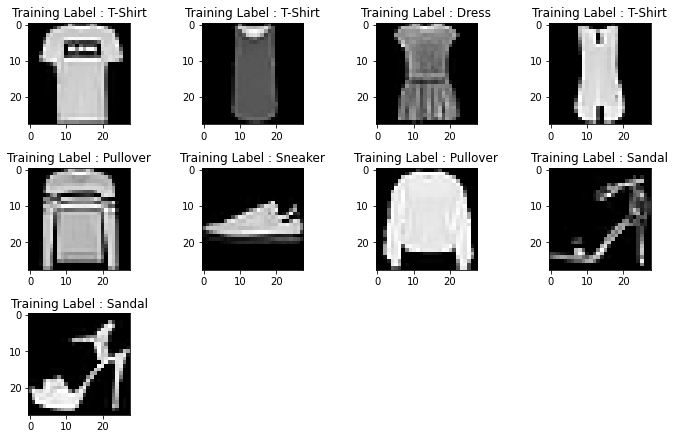

In [ ]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Orginal Model(Overfitted)

In [ ]:
input_size = 784
out_size = 10
hidden_sizes = [128, 128, 128, 64]

In [ ]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[3], out_size),
                       nn.LogSoftmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [ ]:
def get_accuracy(model, data):
  loader = torch.utils.data.DataLoader(data, batch_size=500)

  correct, total = 0, 0
  for xs, ts in loader:
      xs = xs.view(-1, 784) # flatten the image
      zs = model(xs)
      pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(ts.view_as(pred)).sum().item()
      total += int(ts.shape[0])
      return correct / total

In [ ]:
## Train your model
epochs = 50

train_acc_arr = []
test_acc_arr = []
train_err_arr =[]

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:
        
    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()
    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Epoch:{e}, Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")
    train_acc_arr.append(correct / total)
    tst_acc_tmp = get_accuracy(model,testset)
    test_acc_arr.append(tst_acc_tmp)
    train_err_arr.append(running_loss/len(trainloader))


Epoch:0, Training loss: 0.5763928602213291, Training accuracy: 0.7985
Epoch:1, Training loss: 0.45604852340750096, Training accuracy: 0.8454333333333334
Epoch:2, Training loss: 0.4716822660998749, Training accuracy: 0.8427666666666667
Epoch:3, Training loss: 0.43033352284543297, Training accuracy: 0.8553666666666667
Epoch:4, Training loss: 0.4044213593800439, Training accuracy: 0.8614833333333334
Epoch:5, Training loss: 0.4166389740924083, Training accuracy: 0.8591166666666666
Epoch:6, Training loss: 0.4013321760144315, Training accuracy: 0.8617666666666667
Epoch:7, Training loss: 0.39911607741070454, Training accuracy: 0.8644
Epoch:8, Training loss: 0.39035663566291967, Training accuracy: 0.8667333333333334
Epoch:9, Training loss: 0.377565211102144, Training accuracy: 0.8700666666666667
Epoch:10, Training loss: 0.3898057629352312, Training accuracy: 0.865
Epoch:11, Training loss: 0.39377028320326224, Training accuracy: 0.866
Epoch:12, Training loss: 0.37289983275602623, Training accur

In [ ]:
training_acc = get_accuracy(model,trainset)
test_acc = get_accuracy(model,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.886
accuracy on Testset: 0.858


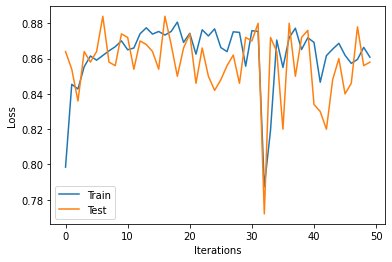

In [ ]:
# plotting
plt.plot(train_acc_arr, label="Train")
plt.plot(test_acc_arr, label="Test")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Part A

### Augmentation (GaussianBlur, RandomAffime)

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
                                transforms.RandomAffine(degrees=(0, 50), translate=(0.1, 0.3), scale=(0.5, 0.75)),
                                transforms.Resize((28,28))
                                ])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

In [ ]:
len(trainset)

60000

In [ ]:
input_size = 784
out_size = 10
hidden_sizes = [128, 128, 128, 64]

In [ ]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[3], out_size),
                       nn.LogSoftmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [ ]:
## Train your model
epochs = 30

train_acc_arr = []
test_acc_arr = []
train_err_arr =[]

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()
    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Epoch:{e}, Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")
    train_acc_arr.append(correct / total)
    tst_acc_tmp = get_accuracy(model,testset)
    test_acc_arr.append(tst_acc_tmp)
    train_err_arr.append(running_loss/len(trainloader))

Epoch:0, Training loss: 1.1761837228020626, Training accuracy: 0.7138
Epoch:1, Training loss: 1.0903961451323048, Training accuracy: 0.7526666666666666
Epoch:2, Training loss: 1.0464278200923254, Training accuracy: 0.7831166666666666
Epoch:3, Training loss: 1.0261023794410071, Training accuracy: 0.7974833333333334
Epoch:4, Training loss: 0.9917622704241575, Training accuracy: 0.8147666666666667
Epoch:5, Training loss: 0.9714864489239162, Training accuracy: 0.82675
Epoch:6, Training loss: 0.9550855330058506, Training accuracy: 0.8343833333333333
Epoch:7, Training loss: 0.9343619089899287, Training accuracy: 0.84405
Epoch:8, Training loss: 0.9130200767822103, Training accuracy: 0.8525166666666666
Epoch:9, Training loss: 0.9180301922216598, Training accuracy: 0.8535166666666666
Epoch:10, Training loss: 0.9149084890575043, Training accuracy: 0.8528166666666667
Epoch:11, Training loss: 0.9017858264415757, Training accuracy: 0.8595166666666666
Epoch:12, Training loss: 0.8859127388198746, Tra

In [ ]:
training_acc = get_accuracy(model,trainset)
test_acc = get_accuracy(model,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.914
accuracy on Testset: 0.89


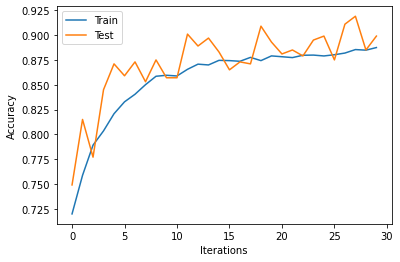

In [ ]:
# plotting
plt.plot(train_acc_arr, label="Train")
plt.plot(test_acc_arr, label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Part B

## L1 Regularization

In [ ]:
input_size = 784
out_size = 10
hidden_sizes = [128, 128, 128, 64]

In [ ]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[3], out_size),
                       nn.LogSoftmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [ ]:
## Train your model
epochs = 30

train_acc_arr = []
test_acc_arr = []
train_err_arr =[]

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()

    ## L1 Regularization ##
    l1_lambda = 0.005
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    
    loss = loss + l1_lambda * l1_norm

    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Epoch:{e}, Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")
    train_acc_arr.append(correct / total)
    tst_acc_tmp = get_accuracy(model,testset)
    test_acc_arr.append(tst_acc_tmp)
    train_err_arr.append(running_loss/len(trainloader))

Epoch:0, Training loss: 1.1761837228020626, Training accuracy: 0.7138
Epoch:1, Training loss: 1.0903961451323048, Training accuracy: 0.7526666666666666
Epoch:2, Training loss: 1.0464278200923254, Training accuracy: 0.7831166666666666
Epoch:3, Training loss: 1.0261023794410071, Training accuracy: 0.7974833333333334
Epoch:4, Training loss: 0.9917622704241575, Training accuracy: 0.8147666666666667
Epoch:5, Training loss: 0.9714864489239162, Training accuracy: 0.82675
Epoch:6, Training loss: 0.9550855330058506, Training accuracy: 0.8343833333333333
Epoch:7, Training loss: 0.9343619089899287, Training accuracy: 0.84405
Epoch:8, Training loss: 0.9130200767822103, Training accuracy: 0.8525166666666666
Epoch:9, Training loss: 0.9180301922216598, Training accuracy: 0.8535166666666666
Epoch:10, Training loss: 0.9149084890575043, Training accuracy: 0.8528166666666667
Epoch:11, Training loss: 0.9017858264415757, Training accuracy: 0.8595166666666666
Epoch:12, Training loss: 0.8859127388198746, Tra

In [ ]:
training_acc = get_accuracy(model,trainset)
test_acc = get_accuracy(model,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.892
accuracy on Testset: 0.908


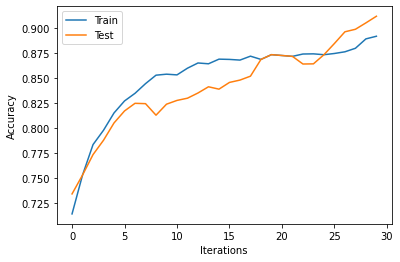

In [ ]:
# plotting
plt.plot(train_acc_arr, label="Train")
plt.plot(test_acc_arr, label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## L2 regularization

In [ ]:
input_size = 784
out_size = 10
hidden_sizes = [128, 128, 128, 64]

In [ ]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[3], out_size),
                       nn.LogSoftmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01, weight_decay=1e-4)

In [ ]:
## Train your model
epochs = 30

train_acc_arr = []
test_acc_arr = []
train_err_arr =[]

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()
    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Epoch:{e}, Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")
    train_acc_arr.append(correct / total)
    tst_acc_tmp = get_accuracy(model,testset)
    test_acc_arr.append(tst_acc_tmp)
    train_err_arr.append(running_loss/len(trainloader))

Epoch:0, Training loss: 0.5412545205115764, Training accuracy: 0.8087333333333333
Epoch:1, Training loss: 0.4681565854340982, Training accuracy: 0.8364833333333334
Epoch:2, Training loss: 0.44404661993799943, Training accuracy: 0.8452333333333333
Epoch:3, Training loss: 0.4377444475285534, Training accuracy: 0.8481333333333333
Epoch:4, Training loss: 0.4276478990896551, Training accuracy: 0.8518833333333333
Epoch:5, Training loss: 0.4339607051218242, Training accuracy: 0.8496666666666667
Epoch:6, Training loss: 0.4266398971014694, Training accuracy: 0.8520333333333333
Epoch:7, Training loss: 0.4260117001275518, Training accuracy: 0.8508666666666667
Epoch:8, Training loss: 0.4268211979093328, Training accuracy: 0.85045
Epoch:9, Training loss: 0.42228991310320685, Training accuracy: 0.852
Epoch:10, Training loss: 0.4247978464054909, Training accuracy: 0.8527833333333333
Epoch:11, Training loss: 0.4330111097997186, Training accuracy: 0.8507833333333333
Epoch:12, Training loss: 0.421862888

In [ ]:
training_acc = get_accuracy(model,trainset)
test_acc = get_accuracy(model,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.86
accuracy on Testset: 0.865


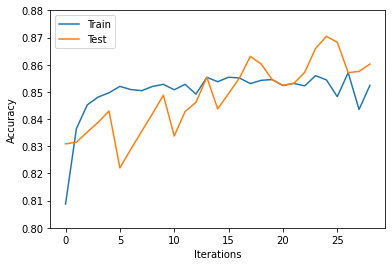

In [ ]:
# plotting
plt.plot(train_acc_arr, label="Train")
plt.plot(test_acc_arr, label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.ylim([0.80,0.88])
plt.legend()
plt.show()

## L1 + L2 Regularization

In [ ]:
input_size = 784
out_size = 10
hidden_sizes = [128, 128, 128, 64]

In [ ]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[3], out_size),
                       nn.LogSoftmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01, weight_decay=1e-5)

In [ ]:
## Train your model
epochs = 25

train_acc_arr = []
test_acc_arr = []
train_err_arr =[]

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()

    ## L1 Regularization ##
    l1_lambda = 0.005
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    
    loss = loss + l1_lambda * l1_norm

    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Epoch:{e}, Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")
    train_acc_arr.append(correct / total)
    tst_acc_tmp = get_accuracy(model,testset)
    test_acc_arr.append(tst_acc_tmp)
    train_err_arr.append(running_loss/len(trainloader))

Epoch:0, Training loss: 67.17381532868343, Training accuracy: 0.7967
Epoch:1, Training loss: 93.05127726638241, Training accuracy: 0.8456
Epoch:2, Training loss: 111.54618819181853, Training accuracy: 0.8477666666666667
Epoch:3, Training loss: 124.25192813019254, Training accuracy: 0.8517333333333333
Epoch:4, Training loss: 125.03180775916907, Training accuracy: 0.8455166666666667
Epoch:5, Training loss: 120.16572674098553, Training accuracy: 0.8610333333333333
Epoch:6, Training loss: 125.56212467933769, Training accuracy: 0.8595333333333334
Epoch:7, Training loss: 144.55218130083227, Training accuracy: 0.85935
Epoch:8, Training loss: 139.34628944966332, Training accuracy: 0.8604666666666667
Epoch:9, Training loss: 133.1472954658557, Training accuracy: 0.8634666666666667
Epoch:10, Training loss: 134.37090347062295, Training accuracy: 0.8572166666666666
Epoch:11, Training loss: 133.47700103564557, Training accuracy: 0.86415
Epoch:12, Training loss: 130.99248588415605, Training accuracy:

In [ ]:
training_acc = get_accuracy(model,trainset)
test_acc = get_accuracy(model,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.804
accuracy on Testset: 0.834


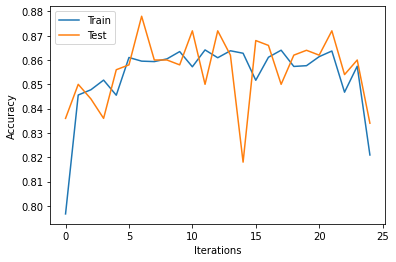

In [ ]:
# plotting
plt.plot(train_acc_arr, label="Train")
plt.plot(test_acc_arr, label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Dropout

In [ ]:
input_size = 784
out_size = 10
hidden_sizes = [128, 128, 128, 64]

In [ ]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.Dropout(p=0.15),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                       nn.Dropout(p=0.15),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                       nn.Dropout(p=0.15),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[3], out_size),
                       nn.LogSoftmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): Dropout(p=0.15, inplace=False)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=128, bias=True)
  (6): Dropout(p=0.15, inplace=False)
  (7): ReLU()
  (8): Linear(in_features=128, out_features=64, bias=True)
  (9): Dropout(p=0.15, inplace=False)
  (10): ReLU()
  (11): Linear(in_features=64, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [ ]:
## Train your model
epochs = 30

train_acc_arr = []
test_acc_arr = []
train_err_arr =[]

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()
    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Epoch:{e}, Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")
    train_acc_arr.append(correct / total)
    tst_acc_tmp = get_accuracy(model,testset)
    test_acc_arr.append(tst_acc_tmp)
    train_err_arr.append(running_loss/len(trainloader))

Epoch:0, Training loss: 0.7135863828697184, Training accuracy: 0.7491833333333333
Epoch:1, Training loss: 0.6282742793626114, Training accuracy: 0.78565
Epoch:2, Training loss: 0.6466622405977391, Training accuracy: 0.7810666666666667
Epoch:3, Training loss: 0.6973957948402555, Training accuracy: 0.7983166666666666
Epoch:4, Training loss: 0.6522023280355722, Training accuracy: 0.8313166666666667
Epoch:5, Training loss: 0.7093712201536592, Training accuracy: 0.8525166666666666
Epoch:6, Training loss: 0.7530300883786765, Training accuracy: 0.8507333333333334
Epoch:7, Training loss: 0.6999087696517708, Training accuracy: 0.8546166666666666
Epoch:8, Training loss: 0.7084944929395404, Training accuracy: 0.8644333333333333
Epoch:9, Training loss: 0.6755662526466699, Training accuracy: 0.8664333333333333
Epoch:10, Training loss: 0.6801234694686271, Training accuracy: 0.8748
Epoch:11, Training loss: 0.7237203375998337, Training accuracy: 0.8762833333333333
Epoch:12, Training loss: 0.6949285703

In [ ]:
training_acc = get_accuracy(model,trainset)
test_acc = get_accuracy(model,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.915
accuracy on Testset: 0.894


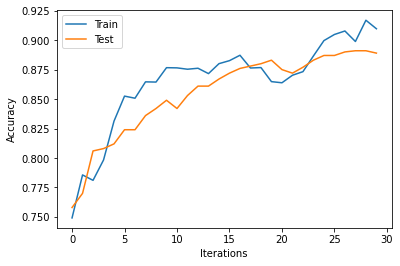

In [ ]:
# plotting
plt.plot(train_acc_arr, label="Train")
plt.plot(test_acc_arr, label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Part D

## Augmentation, L1, L2, Dropout

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
                                transforms.RandomAffine(degrees=(0, 50), translate=(0.1, 0.3), scale=(0.5, 0.75)),
                                transforms.Resize((28,28))
                                ])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

In [ ]:
input_size = 784
out_size = 10
hidden_sizes = [128, 128, 128, 64]

In [ ]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.Dropout(p=0.15),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                       nn.Dropout(p=0.15),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                       nn.Dropout(p=0.15),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[3], out_size),
                       nn.LogSoftmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): Dropout(p=0.15, inplace=False)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=128, bias=True)
  (6): Dropout(p=0.15, inplace=False)
  (7): ReLU()
  (8): Linear(in_features=128, out_features=64, bias=True)
  (9): Dropout(p=0.15, inplace=False)
  (10): ReLU()
  (11): Linear(in_features=64, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01, weight_decay=1e-5)

In [ ]:
## Train your model
epochs = 30

train_acc_arr = []
test_acc_arr = []
train_err_arr =[]

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()

    ## L1 Regularization ##
    l1_lambda = 0.005
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    
    loss = loss + l1_lambda * l1_norm

    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Epoch:{e}, Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")
    train_acc_arr.append(correct / total)
    tst_acc_tmp = get_accuracy(model,testset)
    test_acc_arr.append(tst_acc_tmp)
    train_err_arr.append(running_loss/len(trainloader))

Epoch:0, Training loss: 88.54926662811084, Training accuracy: 0.6709
Epoch:1, Training loss: 132.8337645866215, Training accuracy: 0.7217333333333334
Epoch:2, Training loss: 152.01959592904618, Training accuracy: 0.7311833333333333
Epoch:3, Training loss: 168.92725042086929, Training accuracy: 0.7323333333333333
Epoch:4, Training loss: 177.27251470114376, Training accuracy: 0.7424833333333333
Epoch:5, Training loss: 178.588112349195, Training accuracy: 0.7464833333333333
Epoch:6, Training loss: 185.3807957533326, Training accuracy: 0.7388833333333334
Epoch:7, Training loss: 185.52686075564387, Training accuracy: 0.7456666666666666
Epoch:8, Training loss: 186.0116131097269, Training accuracy: 0.7401
Epoch:9, Training loss: 193.32117810279829, Training accuracy: 0.7317666666666667
Epoch:10, Training loss: 195.3194823112569, Training accuracy: 0.7373333333333333
Epoch:11, Training loss: 194.72566615188046, Training accuracy: 0.7344
Epoch:12, Training loss: 198.42044200775211, Training acc

In [ ]:
training_acc = get_accuracy(model,trainset)
test_acc = get_accuracy(model,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.735
accuracy on Testset: 0.716


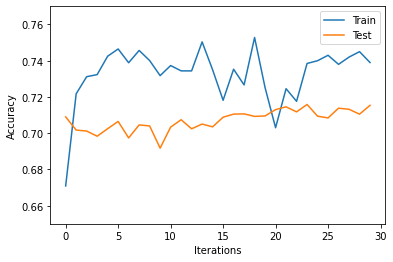

In [ ]:
# plotting
plt.plot(train_acc_arr, label="Train")
plt.plot(test_acc_arr, label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.ylim([0.65,0.77])
plt.legend()
plt.show()